In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from inference.text_generation.util import num2word

In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [4]:
def combine(df_g):
    frames = []
    for name in ["pre_trained_only", "fine_tuned"]:
        fr = df_g[name]
        fr.name ="accuracy"
        fr = fr.reset_index()
        fr.loc[:,"type"] = name
        frames.append(fr)
    return pd.concat(frames).reset_index(drop=True)

def f_percentage(x, pos):
    """
    Adds percentage sign to plot ticks.
    """

    return '{:.1%}'.format(x)

y_axis_formatter = FuncFormatter(f_percentage)

pre_trained_only    0.000
fine_tuned          0.553
dtype: float64


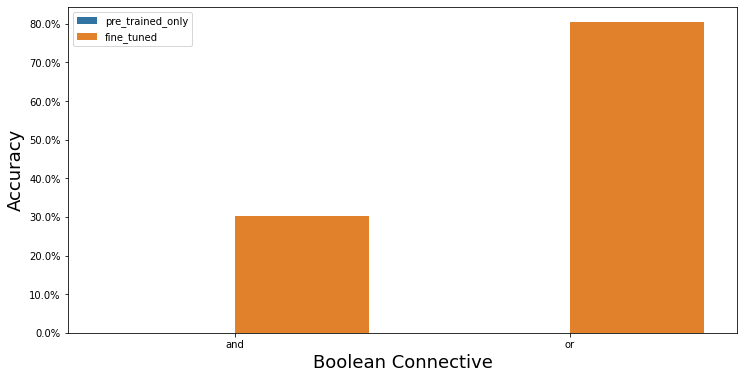

In [18]:
df1 = pd.read_csv("results/BC_basic.csv")
df1 = df1[["label",
        "bert_base_uncased_pre_trained",
        "bert_base_uncased_fine_tuned"]]

df1 = df1.rename(columns={"bert_base_uncased_pre_trained":"pre_trained_only",
                          "bert_base_uncased_fine_tuned":"fine_tuned"})

df1.loc[:, "fine_tuned"] = df1.fine_tuned.where(df1.fine_tuned ==1, 0)
df1.loc[:, "pre_trained_only"] = df1.pre_trained_only.where(df1.pre_trained_only ==1, 0)
print(df1.mean())

df1_g = combine(df1.groupby("label").mean())

figsize = (12,6)
xlabel = "Boolean Connective"
ylabel = "Accuracy"
path = "img/MI_Boolean_acc.png"

fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.barplot(x="label", y="accuracy", hue="type", data=df1_g,ax=ax);
ax.set_xlabel(xlabel, fontsize=18)
ax.set_ylabel(ylabel, fontsize=18)
ax.yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
plt.xticks(rotation=0)
ax.legend(loc="best")
plt.savefig(path, bbox_inches='tight', pad_inches=0.5)


pre_trained_only    0.185
fine_tuned          1.000
dtype: float64


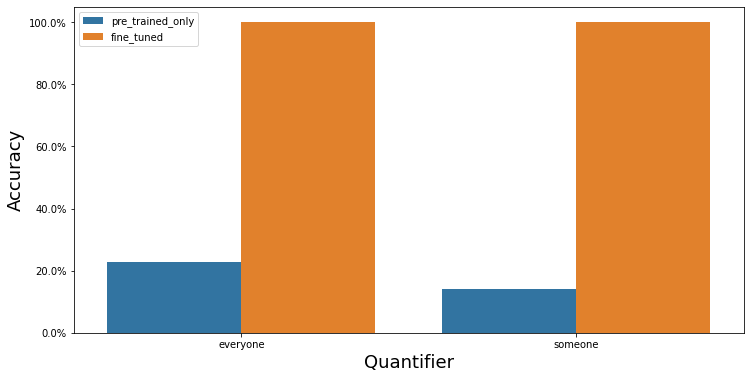

In [22]:
df2 = pd.read_csv("results/Q_basic.csv")
df2 = df2[["label",
        "bert_base_uncased_pre_trained",
        "bert_base_uncased_fine_tuned"]]



df2 = df2.rename(columns={"bert_base_uncased_pre_trained":"pre_trained_only",
                          "bert_base_uncased_fine_tuned":"fine_tuned"})

df2.loc[:, "fine_tuned"] = df2.fine_tuned.where(df2.fine_tuned ==1, 0)
df2.loc[:, "pre_trained_only"] = df2.pre_trained_only.where(df2.pre_trained_only ==1, 0)
print(df2.mean())
df2_g = combine(df2.groupby("label").mean())


figsize = (12,6)
xlabel = "Quantifier"
ylabel = "Accuracy"
path = "img/MI_quantifier_acc.png"

fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.barplot(x="label", y="accuracy", hue="type", data=df2_g,ax=ax);
ax.set_xlabel(xlabel, fontsize=18)
ax.set_ylabel(ylabel, fontsize=18)
ax.yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
plt.xticks(rotation=0)
ax.legend(loc="best")
plt.savefig(path, bbox_inches='tight', pad_inches=0.5)



pre_trained_only    0.047
fine_tuned          0.132
dtype: float64


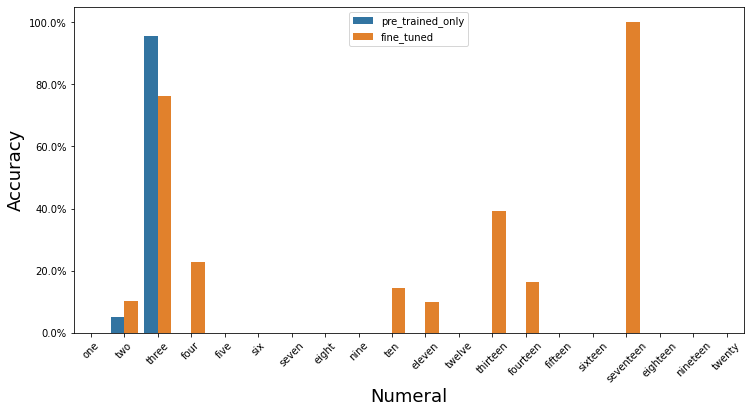

In [21]:
df3 = pd.read_csv("results/count_basic.csv")
df3 = df3[["label",
        "bert_base_uncased_pre_trained",
        "bert_base_uncased_fine_tuned"]]



df3 = df3.rename(columns={"bert_base_uncased_pre_trained":"pre_trained_only",
                          "bert_base_uncased_fine_tuned":"fine_tuned"})

df3.loc[:, "fine_tuned"] = df3.fine_tuned.where(df3.fine_tuned ==1, 0)
df3.loc[:, "pre_trained_only"] = df3.pre_trained_only.where(df3.pre_trained_only ==1, 0)
print(df3.mean())

df3_g = combine(df3.groupby("label").mean())

numerals = list(num2word.values())
numerals = [n for n in numerals if n in set(df3.label)]
df3_g = df3_g.set_index("label").loc[numerals].reset_index()

figsize = (12,6)
xlabel = "Numeral"
ylabel = "Accuracy"
path = "img/MI_count_acc.png"

fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.barplot(x="label", y="accuracy", hue="type", data=df3_g,ax=ax);
ax.set_xlabel(xlabel, fontsize=18)
ax.set_ylabel(ylabel, fontsize=18)
ax.yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
plt.xticks(rotation=45)
ax.legend(loc="best")
plt.savefig(path, bbox_inches='tight', pad_inches=0.5)
